In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns

In [4]:
cols = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

In [9]:
housing_df = pd.read_csv('housing.csv', names=cols, delim_whitespace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_15972\3817399237.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  housing_df = pd.read_csv('housing.csv', names=cols, delim_whitespace=True)


In [10]:
housing_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [11]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [12]:
before_drop = housing_df.shape[0]

housing_df = housing_df.drop_duplicates()

after_drop = housing_df.shape[0]

print(f'Total number of rows before dropping duplicates: {before_drop}')
print(f'Total number of rows after dropping duplicates: {after_drop}')


Total number of rows before dropping duplicates: 506
Total number of rows after dropping duplicates: 506


In [13]:
# Short description

housing_df.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


Text(0.5, 1.0, 'Correlation Plot')

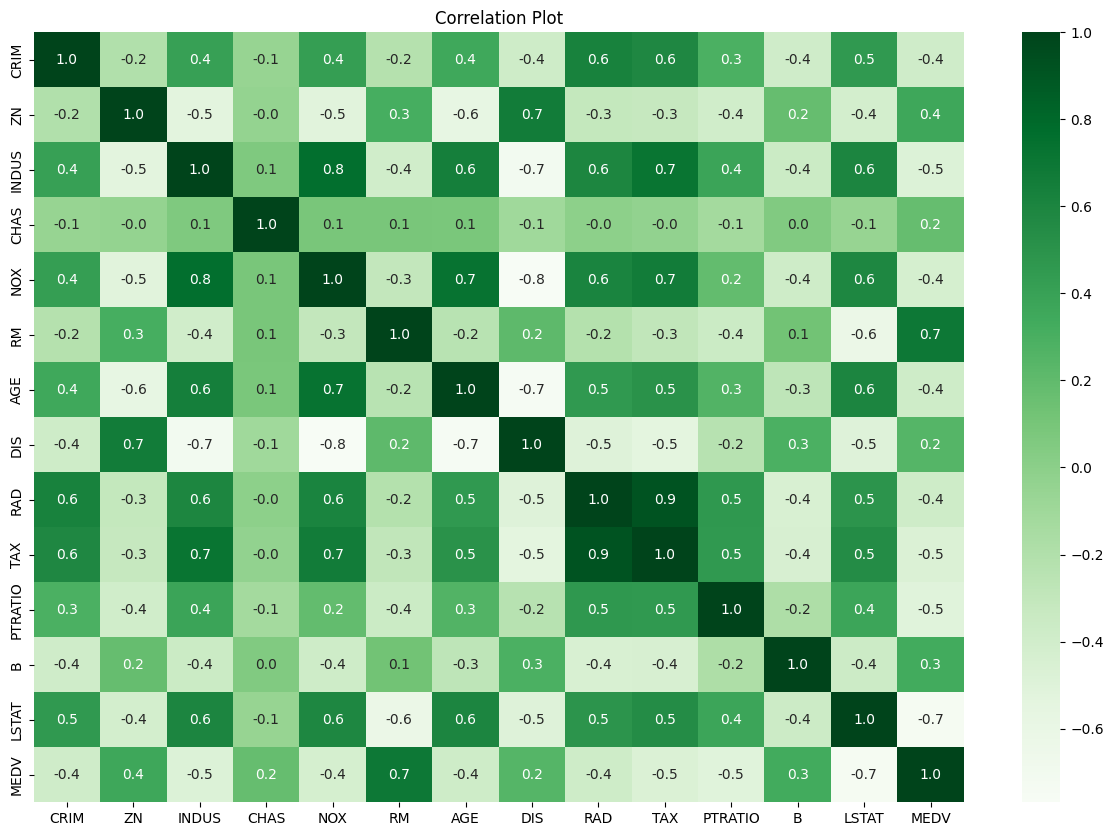

In [16]:
# Check correlation

corr_data = housing_df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(data=corr_data, cmap='Greens', fmt='.1f', annot=True)
plt.title('Correlation Plot')

# multi-collinearity Checks

In [20]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [18]:
X = housing_df.drop('MEDV',axis=1)
y = housing_df.MEDV

In [22]:
VIF_df = pd.DataFrame()

VIF_df['Features'] = X.columns

VIF_df['VIF value'] = [variance_inflation_factor(X.values, x) for x in range(len(X.columns))]

In [23]:
VIF_df

,Features,VIF value
0,CRIM,2.100373
1,ZN,2.844013
2,INDUS,14.485758
3,CHAS,1.152952
4,NOX,73.894947
5,RM,77.948283
6,AGE,21.386850
7,DIS,14.699652
8,RAD,15.167725
9,TAX,61.227274


In [25]:
predictors = housing_df.drop('MEDV', axis=1)

predictors_corr = housing_df[predictors.columns].corr().abs()

upper_mat = predictors_corr.where(np.triu(np.ones(predictors_corr.shape), k=1).astype(np.bool()))

to_drop = [col for col in upper_mat.columns if any(upper_mat[col] >= 0.7)]


In [26]:
housing_df.drop(to_drop, axis=1, inplace=True)

In [27]:
X = housing_df.drop('MEDV', axis=1)
y = housing_df['MEDV']

In [28]:
vif_df_2 = pd.DataFrame()

vif_df_2['Features'] = X.columns

vif_df_2['VIF values'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]


In [29]:
vif_df_2

,Features,VIF values
0,CRIM,2.076093
1,ZN,1.806984
2,INDUS,8.171772
3,CHAS,1.128577
4,RM,48.022156
5,RAD,5.258939
6,PTRATIO,65.770308
7,B,19.698925
8,LSTAT,8.063510


In [30]:
X.drop('PTRATIO', axis=1, inplace=True)

In [31]:
vif_df_2 = pd.DataFrame()

vif_df_2['Features'] = X.columns

vif_df_2['VIF values'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
vif_df_2

,Features,VIF values
0,CRIM,2.074404
1,ZN,1.772337
2,INDUS,8.085360
3,CHAS,1.101977
4,RM,23.048707
5,RAD,4.956374
6,B,17.286724
7,LSTAT,6.682758


In [32]:
X.drop('RM', axis=1, inplace=True)

In [33]:
vif_df_2 = pd.DataFrame()

vif_df_2['Features'] = X.columns

vif_df_2['VIF values'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
vif_df_2

,Features,VIF values
0,CRIM,2.074082
1,ZN,1.586390
2,INDUS,7.756933
3,CHAS,1.099254
4,RAD,4.673102
5,B,4.870491
6,LSTAT,6.660605


#### Good, multicollinearity checked

In [36]:
new_feats = vif_df_2['Features'].values.tolist()

In [37]:
X_new = X[new_feats]

In [38]:
X_new.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'RAD', 'B', 'LSTAT'], dtype='object')

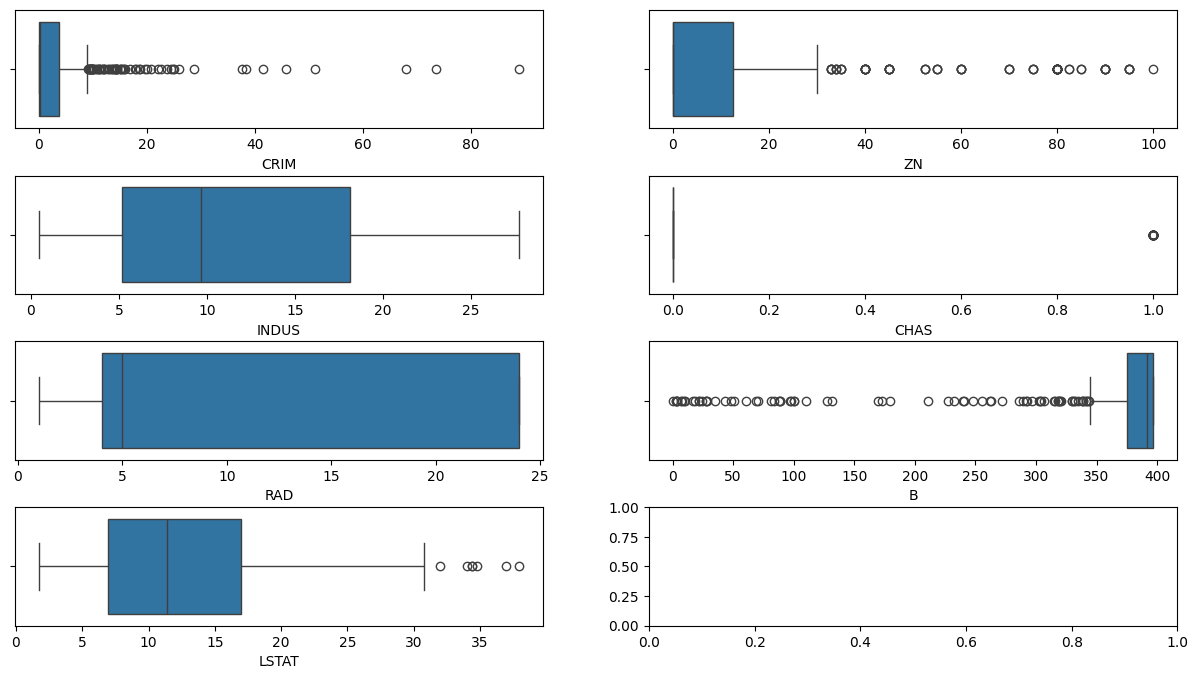

In [39]:
fig, ax = plt.subplots(nrows=((len(X_new.columns) + 1) // 2), ncols=2, figsize=(15,8))
plt.subplots_adjust(hspace=0.4)

for i, x in enumerate(X_new.columns):
    sns.boxplot(x=X_new[x], ax = ax[i//2, i%2])



### Before dropping outliers, let's train our model first

In [54]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=23)

In [56]:
len(X_train), len(X_test)

(354, 152)

In [57]:
len(y_train), len(y_test)

(354, 152)

In [58]:
def train_model(X_train, y_train, model = None):
    try:
        if model != None:
            model.fit(X_train, y_train)
        return model
    except Exception as E:
        return str(E)

In [59]:
from typing import Dict
models = {
    "Random Forest": RandomForestRegressor(),
    "lr model" : LinearRegression()
}

def evaluate_model(models:Dict, X_train, y_train, X_test, y_test):
    for mod in models:
        model = models[mod]
        model = train_model(X_train=X_train, y_train=y_train, model = model)
        train_pred = model.predict(X_train)
        test_pred = model.predict(X_test)

        r2_score_pred_train = r2_score(y_train, train_pred)
        r2_score_pred_test = r2_score(y_test, test_pred)
        mse_train = mean_squared_error(y_train, train_pred)
        mse_test = mean_squared_error(y_test, test_pred)

        print(f"""For model: {mod} the r2_score for train is {r2_score_pred_train} \n
                the r2_score for test is {r2_score_pred_test} \n
                the mean squared error for train is {round(np.sqrt(mse_train), 2)} \n
                the mean squared error for test is {round(np.sqrt(mse_test),2)}""")
        print("===" * 20)
evaluate_model(models, X_train, y_train, X_test, y_test)

For model: Random Forest the r2_score for train is 0.9700262505562379 

                the r2_score for test is 0.7448737891561982 

                the mean squared error for train is 1.6 

                the mean squared error for test is 4.6
For model: lr model the r2_score for train is 0.6063047583592946 

                the r2_score for test is 0.4928717123453704 

                the mean squared error for train is 5.78 

                the mean squared error for test is 6.49


### We suspected outliers, we might just need to remove some of them

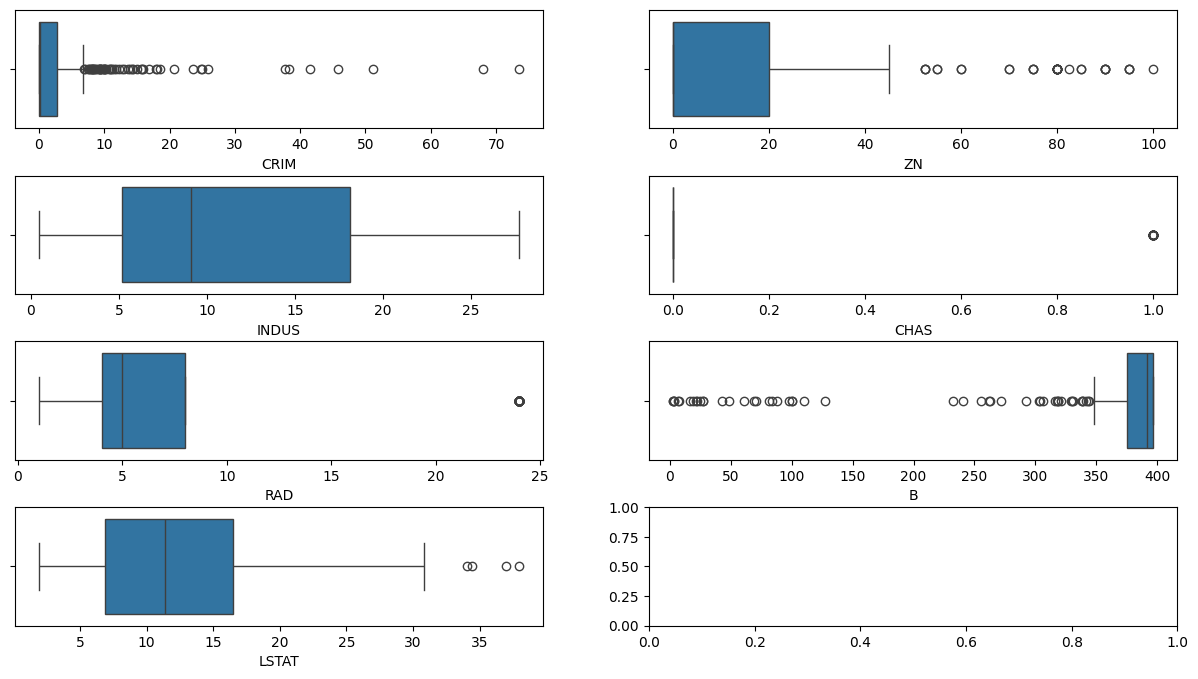

In [61]:
fig, ax = plt.subplots(nrows=((len(X_train.columns) + 1) // 2), ncols=2, figsize=(15,8))
plt.subplots_adjust(hspace=0.4)

for i, x in enumerate(X_train.columns):
    sns.boxplot(x=X_train[x], ax = ax[i//2, i%2])



### Let's try to scale our data

In [120]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)

X_test_scaled = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [121]:
evaluate_model(models, X_train=X_train_scaled, y_train=y_train, X_test=X_test_scaled, y_test=y_test)

For model: Random Forest the r2_score for train is 0.9711037364678983 

                the r2_score for test is 0.750315314139972 

                the mean squared error for train is 1.57 

                the mean squared error for test is 4.55
For model: lr model the r2_score for train is 0.6063047583592946 

                the r2_score for test is 0.4928717123453703 

                the mean squared error for train is 5.78 

                the mean squared error for test is 6.49


### The model can be improved over time

In [122]:
X_train.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'RAD', 'B', 'LSTAT'], dtype='object')

In [123]:
X_train.ZN.min()

np.float64(0.0)

In [124]:
rm_forest = RandomForestRegressor()
rm_forest.fit(X_train_scaled, y_train)

RandomForestRegressor()

In [125]:
import pickle
with open('model.pkl', 'wb') as model:
    pickle.dump(rm_forest, model)

In [126]:
with open('model.pkl', 'rb') as model:
    model = pickle.load(model)

In [127]:
from sklearn.model_selection import GridSearchCV

rm_model = RandomForestRegressor()
param_grid = {
    'n_estimators' : [100, 200],
    'criterion' : ['squared_error', 'absolute_error'],
    'max_depth' : [2,3,4],
    'min_samples_split' : range(2,4)
}
grid_search = GridSearchCV(estimator = rm_forest, n_jobs=-1, param_grid=param_grid, verbose=3)

In [128]:
grid_search.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': [2, 3, 4],
                         'min_samples_split': range(2, 4),
                         'n_estimators': [100, 200]},
             verbose=3)

In [129]:
grid_search.best_score_

np.float64(0.748608729332928)

In [130]:
best_model = grid_search.best_estimator_

In [131]:
best_model.fit(X_train_scaled, y_train)

RandomForestRegressor(max_depth=4, n_estimators=200)

In [132]:
best_model.score(X_train_scaled, y_train)

0.8623911490374125

In [133]:
best_model.score(X_test_scaled, y_test)

0.6887418459966854

In [134]:
lr_model = LinearRegression()

In [135]:
lr_model.fit(X_train_scaled, y_train)

LinearRegression()

In [136]:
lr_model.score(X_train_scaled, y_train)

0.6063047583592946

In [137]:
lr_model.score(X_test_scaled, y_test)

0.4928717123453703

In [138]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import ElasticNet

elast_mod = ElasticNet()

cross_val_score(elast_mod, X_new, y, cv=5)

array([0.29357807, 0.45070074, 0.07800527, 0.37318008, 0.15968933])

In [139]:
elast_mod.fit(X_train_scaled, y_train)

ElasticNet()

In [140]:
elast_mod.score(X_train_scaled, y_train)

0.5361807891010215

In [150]:
X_train_scaled.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'RAD', 'B', 'LSTAT'], dtype='object')

In [141]:
elast_mod.score(X_test_scaled, y_test)

0.4664215326447734

In [142]:
from sklearn.feature_selection import RFE

lr_model = LinearRegression()

selector = RFE(lr_model, n_features_to_select=5)

In [143]:
selector = selector.fit(X_train_scaled, y_train)

In [144]:
selector.get_feature_names_out()

array(['ZN', 'INDUS', 'CHAS', 'B', 'LSTAT'], dtype=object)

In [145]:
selector.score(X_train_scaled, y_train)

0.6040329129278712

In [146]:
selector.score(X_test_scaled, y_test)

0.4908396415264489

In [153]:
X_train_scaled.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'RAD', 'B', 'LSTAT'], dtype='object')

In [149]:
with open('model.pkl', 'wb') as model:
    pickle.dump(elast_mod, model)

In [151]:
X_test.head()

,CRIM,ZN,INDUS,CHAS,RAD,B,LSTAT
176,0.07022,0.0,4.05,0,5,393.23,10.11
311,0.79041,0.0,9.90,0,4,396.90,5.98
94,0.04294,28.0,15.04,0,4,396.90,10.59
139,0.54452,0.0,21.89,0,4,396.90,18.46
232,0.57529,0.0,6.20,0,8,385.91,2.47


In [152]:
y_test

176    23.2
311    22.1
94     20.6
139    17.8
232    41.7
       ... 
213    28.1
373    13.8
437     8.7
281    35.4
263    31.0
Name: MEDV, Length: 152, dtype: float64